In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#Using the pandas library for data analysis and the scikit-learn library for machine learning

#Build a model to predict wheather a new cust will churn or not

In [3]:
#Predicting Customer Churn

#Churn is when a customer stops doing business or ends a relationship with a company.

#It’s a common problem across a variety of industries, from telecommunications to cable TV etc
#company that can predict churn can take proactive action to retain valuable customers and get ahead of the competition

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head() # checking first 5 rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#How many churners does the dataset have, and how many non-churners
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.info() # totalcharges is object so change in to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
#ChangeTotalcharges in to numeric variable 

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
print(df.groupby(['Churn']).mean())

# churning cust having are having less tunure and high monthly charges 


       SeniorCitizen     tenure  MonthlyCharges  TotalCharges
Churn                                                        
No          0.128721  37.569965       61.265124   2555.344141
Yes         0.254682  17.979133       74.441332   1531.796094


In [11]:
#checking missing value 
df.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# remove missing values
df.dropna(inplace = True)

In [13]:
# check dimensions of dataset
df.shape

(7032, 21)

In [14]:
# EDA
# Important to understand how your variables are distributed

Number of cells labeled yes:  1869
Number of cells labeled no :  5163

% of cells labeled churn 26.58 %
% of cells labeled no churn 73.42 %


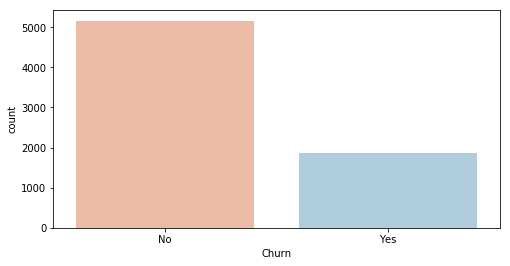

In [15]:
# visualize distribution of classes # after droping missing values 

plt.figure(figsize=(8, 4))
sns.countplot(df['Churn'], palette='RdBu')

# count number of obvs in each class
No,Yes = df['Churn'].value_counts()
print('Number of cells labeled yes: ', Yes)
print('Number of cells labeled no : ', No)
print('')
print('% of cells labeled churn', round(Yes / len(df) * 100, 2), '%')
print('% of cells labeled no churn', round(No / len(df) * 100, 2), '%')



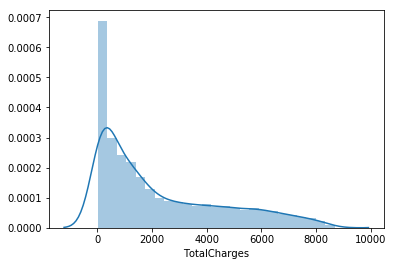

In [16]:
import matplotlib.pyplot as plt  # distribution is skewed & not normally distibuted of feature totalcharges 
import seaborn as sns
sns.distplot(df['TotalCharges'])
plt.show()

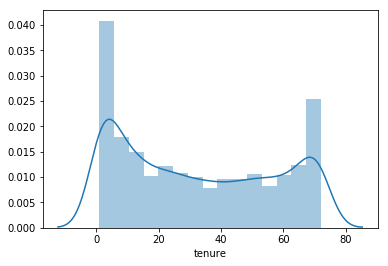

In [17]:
sns.distplot(df['tenure']) # not normally distributed # not a proper bell shaped curve
plt.show()

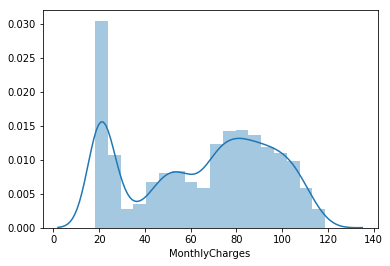

In [18]:
sns.distplot(df['MonthlyCharges'])
plt.show()

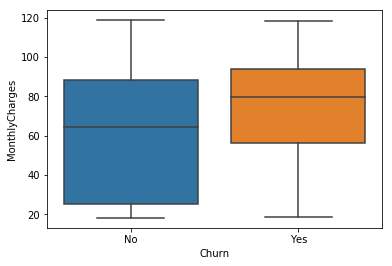

In [19]:
#Differences in Monthlycharges of churn and non churn customer using boxplot
sns.boxplot(x ='Churn',y ='MonthlyCharges',data = df)
plt.show()
# there is much of a difference in monthly charges between churners and non-churners.
# mean monthly charges of cust those are churn are higher 

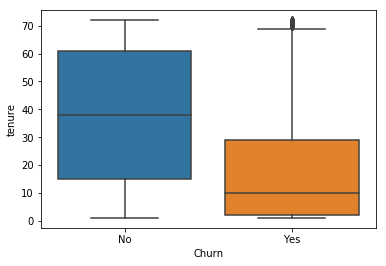

In [20]:
#Differences in tenure of churn and non churn customer using boxplot 
#There is a very noticeable difference here between churners and non-churners

sns.boxplot(x ='Churn',y ='tenure',data = df)
plt.show() 

#  there is much of a difference in tenure lengths between churners and non-churners.
# mean length of tenure of cust those are churn cust is less as compared to No churn cust 

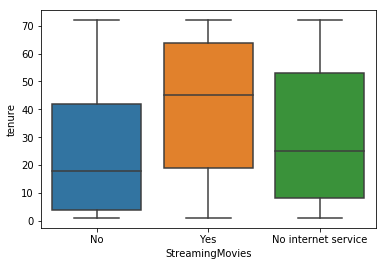

In [21]:
# there is noticeable diff in length of tenure ,those who streaming movies have long tenure
sns.boxplot(x ='StreamingMovies',y ='tenure',data = df)
plt.show()


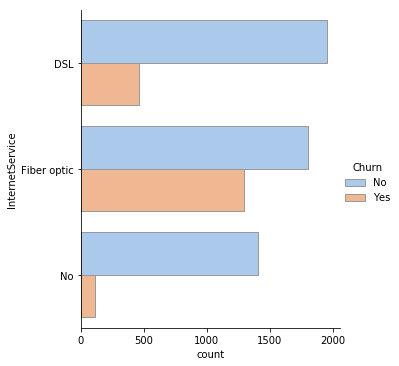

In [22]:
# cust those have Fibre optic are more consist of churn cust as compare to services like DSL and No services
sns.catplot(y="InternetService", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);



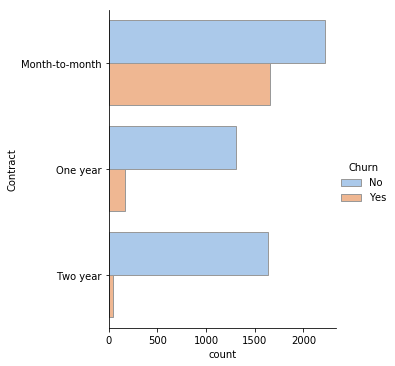

In [23]:
# In month to Month contract the percentage of churn cust is more as comapre to one year and Two year , very less no cust churn in 2 yr contract
sns.catplot(y="Contract", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

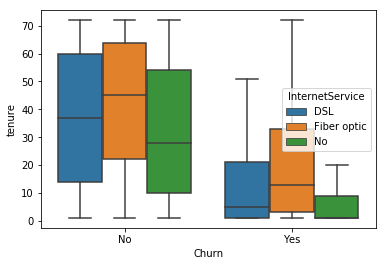

In [24]:
# Add "internet services" as a third variable # for removing outlier can specify the additional parameter sym=""
sns.boxplot(x = 'Churn',
            y = 'tenure',
            data = df,
            sym = "",
            hue = "InternetService")

# Display the plot
plt.show()

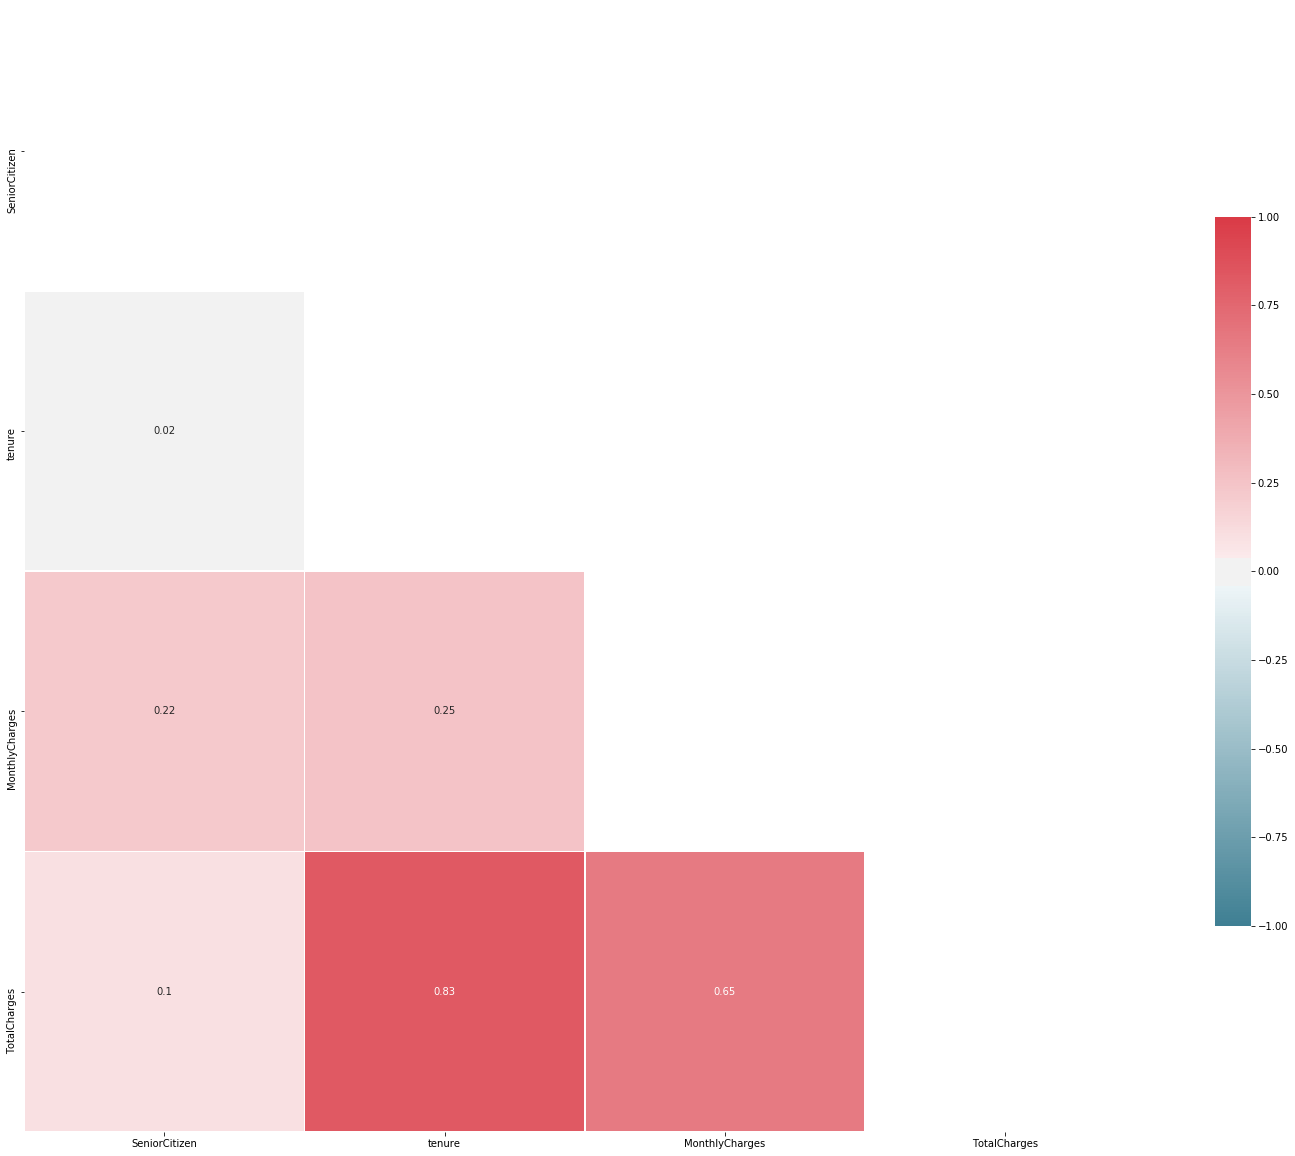

In [25]:
#obtaining correlation matrix

#Tenure and Monthlycharges had highest correlation with TotalCharges 

corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# Data pre_processing

In [26]:
#Remove customer IDs from the data set # unneccessary variable 

# Drop the unnecessary features 

df2 = df.drop(df[['SeniorCitizen','customerID']], axis=1)

In [27]:
# Verify if features dropped
print(df2.columns)

Index(['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [28]:
# convert Churn yes and no with 1,0 value 
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
df2['Churn'] = df2['Churn'].replace({'No':0 , 'Yes':1})

In [29]:
#Let's convert all the categorical variables into dummy variables  
# feature can be encoded numerically using the technique of one hot encoding:

df_new = pd.get_dummies(df2)
df_new.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
#Feature scaling # different scales of the of tenure and charges and plots shown above not normally distributed 
#Centers the distribution around the mean
#the number of standard deviations away from the mean each point is

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_new[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_new[['tenure','MonthlyCharges','TotalCharges']].to_numpy())

In [31]:
# verifying first 5 rows 
df_new.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
#Fit logistic regression model

#Tunning parameter of c (Inverse of regularization strength;) and use of regularization technique l2 as penalty

In [33]:
# target varaiable is y 
y = df_new['Churn'].values

# predictor matrix is x
x = df_new.drop(columns = ['Churn']) 

In [34]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size = 0.30, random_state = 200)


In [35]:
# checking the dimension of train and test dataset
train_x.shape[0] 
train_y.shape[0]

4922

In [36]:
# Import required library for modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

In [37]:
# Different value of paramter c in list and looping tuning parameter # getting different metrics 
C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
for index in range(0, len(C)):  
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_x, train_y)
    pred_test_y = logreg.predict(test_x)
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = accuracy_score(test_y, pred_test_y)
    l1_metrics[index,3] = precision_score(test_y, pred_test_y)
    l1_metrics[index,4] = recall_score(test_y, pred_test_y) 
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names)) 

        C  Non-Zero Coeffs  Accuracy  Precision    Recall
0  1.0000             30.0  0.807109   0.677149  0.560764
1  0.5000             25.0  0.808531   0.680672  0.562500
2  0.2500             27.0  0.807109   0.680171  0.553819
3  0.1000             25.0  0.805687   0.682819  0.538194
4  0.0500             16.0  0.807583   0.693182  0.529514
5  0.0250             15.0  0.805687   0.701456  0.501736
6  0.0100              8.0  0.799052   0.717143  0.435764
7  0.0050              4.0  0.786256   0.755102  0.321181
8  0.0025              2.0  0.727014   0.000000  0.000000


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Paramter C value 0.25 can be choose based on the business perfernces of precision and recall metrices
Maximum accuracy attained with 26 non zero cofficients after that it decline

# Use of SVM in modeling and tunning prameter

#Large value of c : hard margin , forcing input data to explain potentially overfit

#Gamma paramter : how far the training dataset reaches

#large gamma : close training data pts have higher weight

#small gamma : far reach more generalized

In [38]:
# using support vector machine for modeling 
from sklearn.svm import SVC
classifier = SVC()


In [39]:
# tuning paramter and kernel 'rbf'
param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

In [40]:
from sklearn.model_selection import GridSearchCV # using gridsearch to find best parameter 

grid = GridSearchCV(SVC(), param_grid, verbose= 4, refit=True)
grid.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.742, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.740, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.742, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.741, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.742, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.800, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.792, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.794, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.802, total=   1.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [41]:
# Best paramter 
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [42]:
# getting prediction 
optimized_preds = grid.predict(test_x)

In [43]:
#Evaluate the gridsearch SVM # Import accuracy_score
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
acc = accuracy_score(test_y,optimized_preds)
print("Test set accuracy: {:.2f}".format(acc)) # test data accuracy is 80% 

Test set accuracy: 0.80


In [44]:
# obtained different model metrices
from sklearn.metrics import  classification_report
print(classification_report(test_y, optimized_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1534
           1       0.67      0.54      0.60       576

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

